In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
housing_data = pd.read_csv('./data/cali_housing/california_housing_train.csv')

In [5]:
housing_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

In [6]:
#check all column headers
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

array([[<Axes: title={'center': 'median_house_value'}>]], dtype=object)

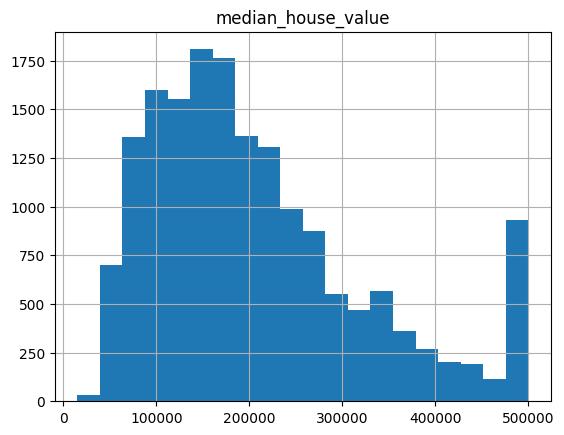

In [7]:
housing_data.hist('median_house_value', bins=20) #to find outliers

In [8]:
#descriptive statistics
housing_data.describe().T

count           mean            std         min  \
longitude           17000.0    -119.562108       2.005166   -124.3500   
latitude            17000.0      35.625225       2.137340     32.5400   
housing_median_age  17000.0      28.589353      12.586937      1.0000   
total_rooms         17000.0    2643.664412    2179.947071      2.0000   
total_bedrooms      17000.0     539.410824     421.499452      1.0000   
population          17000.0    1429.573941    1147.852959      3.0000   
households          17000.0     501.221941     384.520841      1.0000   
median_income       17000.0       3.883578       1.908157      0.4999   
median_house_value  17000.0  207300.912353  115983.764387  14999.0000   

                              25%          50%         75%          max  
longitude             -121.790000    -118.4900    -118.000    -114.3100  
latitude                33.930000      34.2500      37.720      41.9500  
housing_median_age      18.000000      29.0000      37.000      52.0000  
total_rooms           1462.000000    2127.0000    3151.250   37937.0000  
total_bedrooms         297.000000     434.0000     648.250    6445.0000  
population             790.000000    1167.0000    1721.000   35682.0000  
households             282.000000     409.0000     605.250    6082.0000  
median_income            2.566375       3.5446       4.767      15.0001  
median_house_value  119400.000000  180400.0000  265000.000  500001.0000

In [9]:
#missing values
housing_data.isna().any()

#if missing values drop rows
housing_data.dropna(inplace=True,axis=0)

In [10]:
#Approach to missing data
#dropping
#average

In [12]:
#preprocessing to scale
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

<Axes: >

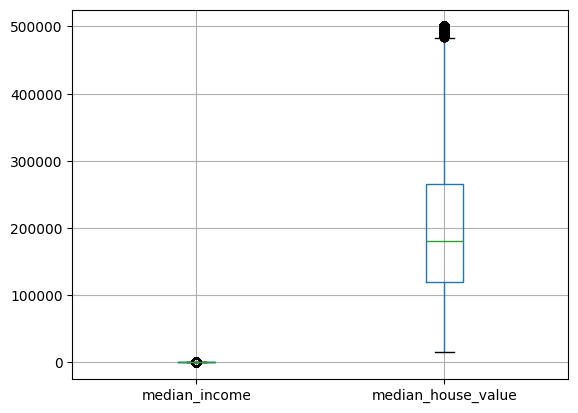

In [13]:
#box plots
#whisker 1.5 times iqr
housing_data.boxplot(['median_income','median_house_value']) #normalize to view

array([[<Axes: title={'center': 'median_income'}>]], dtype=object)

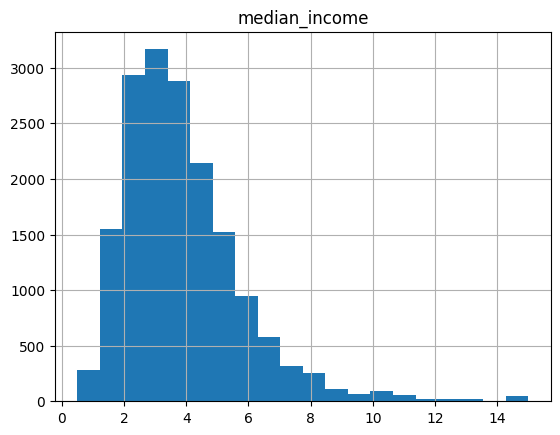

In [14]:
housing_data.hist('median_income',bins=20)

<Axes: xlabel='median_income', ylabel='median_house_value'>

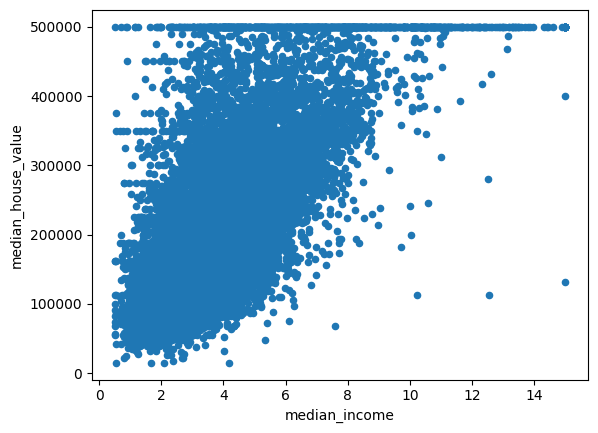

In [15]:
#correlation between income and house value
housing_data.plot(x='median_income', y='median_house_value',kind='scatter')

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

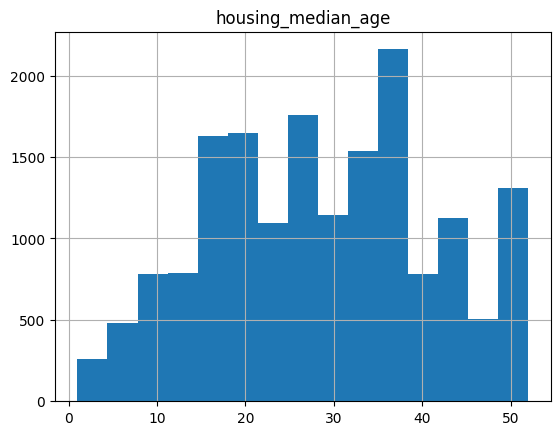

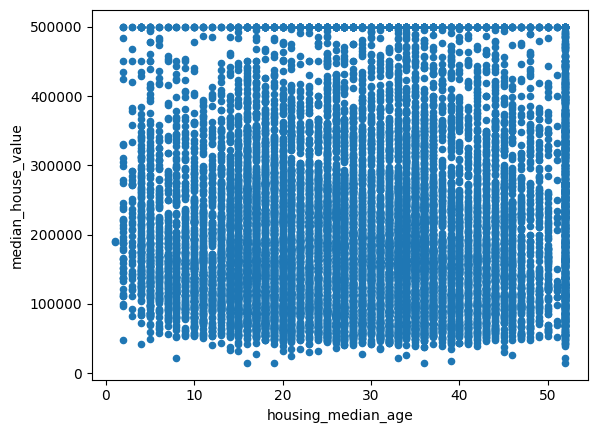

In [16]:
#check inheretence hypothesis
housing_data.hist('housing_median_age',bins=15)
housing_data.plot(x='housing_median_age',y='median_house_value',kind='scatter')

In [18]:
import seaborn as sns

<Axes: xlabel='median_income', ylabel='median_house_value'>

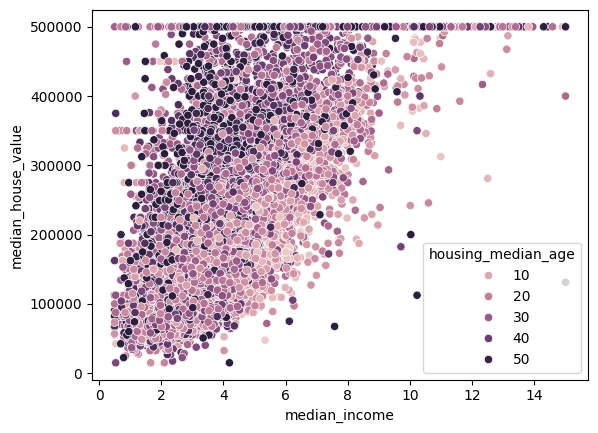

In [19]:
sns.scatterplot(data=housing_data,x='median_income', y='median_house_value',hue='housing_median_age')

<Axes: xlabel='longitude', ylabel='latitude'>

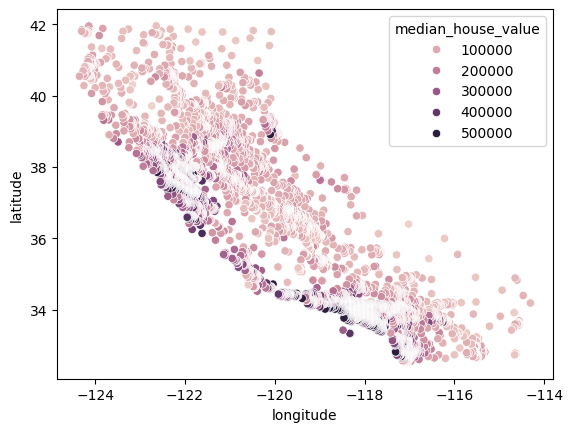

In [20]:
sns.scatterplot(data=housing_data,x='longitude',y='latitude',hue='median_house_value') #fix overlap

<Axes: >

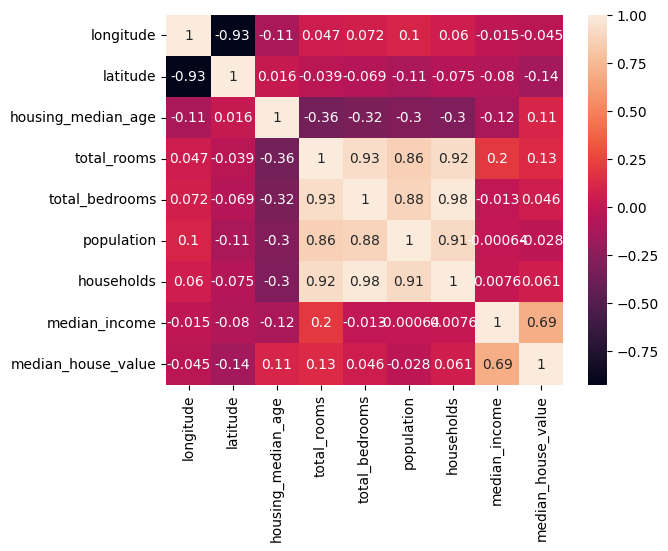

In [21]:
sns.heatmap(data=housing_data.corr(),annot=True)

In [22]:
from sklearn import preprocessing
from sklearn import linear_model

In [23]:
price_reg = linear_model.LinearRegression()

In [25]:
housing_test = pd.read_csv('./data/cali_housing/california_housing_test.csv')

In [26]:
x = housing_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']].values

In [27]:
x_scaled = MinMaxScaler().fit_transform(x)

In [28]:
x_scaled

array([[1.        , 0.17534538, 0.2745098 , ..., 0.02836402, 0.07745437,
        0.06853009],
       [0.98406375, 0.19766206, 0.35294118, ..., 0.03155918, 0.07597435,
        0.09104012],
       [0.9750996 , 0.12221041, 0.31372549, ..., 0.00924914, 0.01907581,
        0.07937822],
       ...,
       [0.00498008, 0.98831031, 0.31372549, ..., 0.03478236, 0.07482322,
        0.1745769 ],
       [0.00498008, 0.98405951, 0.35294118, ..., 0.03629586, 0.07844105,
        0.10205376],
       [0.        , 0.8501594 , 1.        , ..., 0.02250624, 0.04423615,
        0.17343209]])

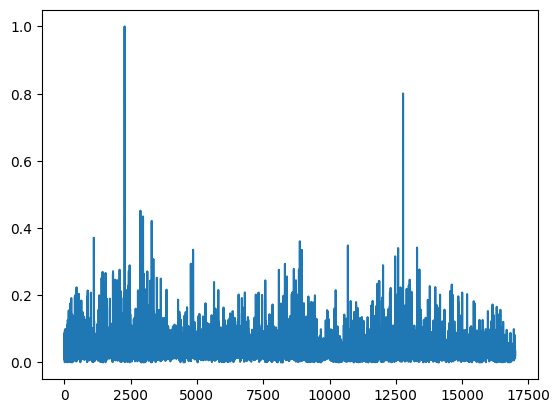

In [29]:
plt.plot(x_scaled[:,5])

In [30]:
y=housing_data['median_house_value'].values

In [31]:
price_reg.fit(X=x,y=y)

LinearRegression()

In [32]:
y_pred = price_reg.predict(x)

In [37]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [38]:
root_mean_squared_error(y,y_pred)

69458.78759326927

In [39]:
mean_value = housing_data['median_house_value'].mean()

In [40]:
y_base = [mean_value]*len(y)

In [41]:
root_mean_squared_error(y,y_base)

115980.35304985354

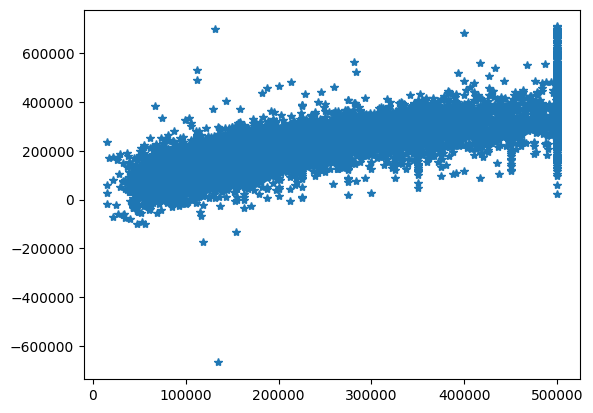

In [42]:
plt.plot(y,y_pred,ls ='',marker='*')

In [43]:
max(y)

500001.0

In [44]:
housing_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [45]:
x_test = housing_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']].values

In [46]:
y_test = housing_test['median_house_value'].values

In [47]:
y_pred_test = price_reg.predict(x_test)

In [48]:
root_mean_squared_error(y_test,y_pred_test)

69765.36022216822